<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ LDA Classification Accuracy: 0.9667


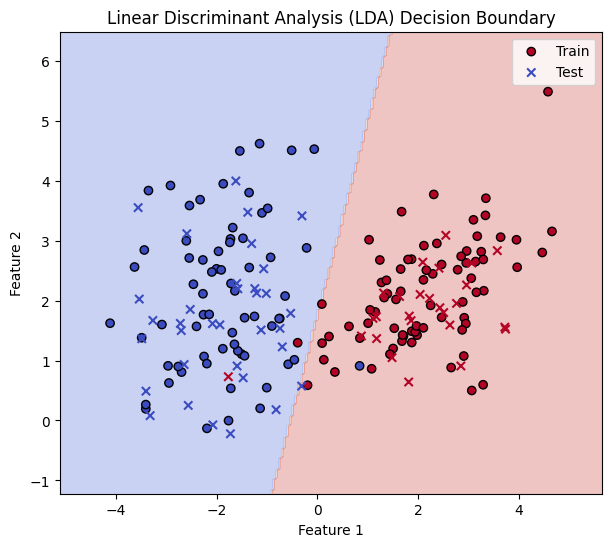

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- 1. Create a simple dataset ---
# Two classes, two features (linearly separable)
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2.0,
                           random_state=42)

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Fit Linear Discriminant Analysis ---
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# --- 4. Evaluate performance ---
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ LDA Classification Accuracy: {acc:.4f}")

# --- 5. Visualize LDA decision boundary ---
# Create grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over grid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolor='k', label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', marker='x', label='Test')
plt.title("Linear Discriminant Analysis (LDA) Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
